# Práctica 4: tranformación de datos numéricos

## Descripción del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("chicago_taxi_trips_2016_01.csv")
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.40,NaN,NaN,24.0,24.0,4.50,0.00,0.0,0.0,4.50,Cash,107.0,199.0,510.0,199.0,510.0
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,240.0,0.70,NaN,NaN,NaN,NaN,4.45,4.45,0.0,0.0,8.90,Credit Card,NaN,NaN,NaN,NaN,NaN
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,0.0,0.00,NaN,NaN,NaN,NaN,42.75,5.00,0.0,0.0,47.75,Credit Card,119.0,NaN,NaN,NaN,NaN
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.10,NaN,NaN,6.0,6.0,7.00,0.00,0.0,0.0,7.00,Cash,NaN,686.0,500.0,686.0,500.0
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,480.0,2.71,NaN,NaN,32.0,NaN,10.25,0.00,0.0,0.0,10.25,Cash,NaN,385.0,478.0,NaN,NaN


In [3]:
varc = ['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras',
        'trip_total', 'company']

In [4]:
X = df[varc]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
for i in range(len(varc)):
    print("La variable "+str(varc[i]))
    print("media: "+str(scaler.mean_[i]))
    print("varianza: "+str(scaler.var_[i]))
    print()
Xs1 = pd.DataFrame(scaler.transform(X),columns=varc)

La variable trip_seconds
media: 653.442181752938
varianza: 869977.3687421273

La variable trip_miles
media: 2.8727017026118684
varianza: 327.8970732586205

La variable fare
media: 13.153964152301722
varianza: 1080.7133460621003

La variable tips
media: 1.515106819668748
varianza: 7.534805443890738

La variable tolls
media: 0.0043082017995371
varianza: 0.6995011478342551

La variable extras
media: 0.9484849850976569
varianza: 655.1570915562528

La variable trip_total
media: 15.621889226696178
varianza: 1825.1750226772956

La variable company
media: 92.60232098475508
varianza: 1165.2057575065348



In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
for i in range(len(varc)):
    print("La variable "+str(varc[i]))
    print("min: "+str(scaler.data_max_[i]))
    print("max: "+str(scaler.data_min_[i]))
    print()
Xs2 = pd.DataFrame(scaler.transform(X),columns=varc)

La variable trip_seconds
min: 86340.0
max: 0.0

La variable trip_miles
min: 3280.0
max: 0.0

La variable fare
min: 9002.29
max: 0.0

La variable tips
min: 450.0
max: 0.0

La variable tolls
min: 999.99
max: 0.0

La variable extras
min: 9993.41
max: 0.0

La variable trip_total
min: 9997.16
max: 0.0

La variable company
min: 119.0
max: 2.0



In [7]:
p25 = X.quantile(0.25)
p75 = X.quantile(0.75)
print("p01:\n", p25)
print()
print("p99:\n", p75)

p01:
 trip_seconds    240.0
trip_miles        0.0
fare              6.0
tips              0.0
tolls             0.0
extras            0.0
trip_total        7.0
company         101.0
Name: 0.25, dtype: float64

p99:
 trip_seconds    840.0
trip_miles        2.4
fare             13.5
tips              2.0
tolls             0.0
extras            1.0
trip_total       15.3
company         107.0
Name: 0.75, dtype: float64


In [8]:
aux = X.dropna()

In [9]:
Xs3 = aux.clip(p25,p75,axis=1).astype('int')
Xs3.head()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,company
0,240,0,6,0,0,0,7,107
2,240,0,13,2,0,0,15,107
7,240,0,6,0,0,0,7,107
8,240,0,6,2,0,1,8,101
10,480,1,7,1,0,0,8,107


In [10]:
for i in varc:
    print("La variable "+str(i))
    print(pd.cut(X[i], bins=10, labels=False).value_counts())
    print()

La variable trip_seconds
0.0    1704553
1.0        530
2.0        126
3.0         64
4.0         60
5.0         52
6.0         47
7.0         28
9.0         17
8.0         14
Name: trip_seconds, dtype: int64

La variable trip_miles
0.0    1705430
1.0        155
5.0         82
4.0         50
2.0         37
3.0         30
9.0          3
6.0          3
7.0          1
Name: trip_miles, dtype: int64

La variable fare
0.0    1705690
1.0         43
7.0          8
9.0          7
2.0          6
6.0          4
4.0          4
3.0          4
8.0          3
5.0          3
Name: fare, dtype: int64

La variable tips
0.0    1705629
1.0        124
2.0         11
3.0          3
9.0          2
8.0          1
7.0          1
4.0          1
Name: tips, dtype: int64

La variable tolls
0.0    1705771
9.0          1
Name: tolls, dtype: int64

La variable extras
0.0    1705731
4.0         10
6.0          9
3.0          8
1.0          7
8.0          2
7.0          2
5.0          2
9.0          1
Name: extras, dt

In [12]:
aux['trip_total'].rank().astype('int').value_counts()

314639     26646
286542     25393
371287     25358
257050     25213
341890     24325
           ...  
300957         1
1066803        1
1071927        1
976096         1
1060357        1
Name: trip_total, Length: 4900, dtype: int64

In [13]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(n_quantiles=1000, random_state=1111, output_distribution='normal')
transformer.fit(aux[['trip_total']])
E = transformer.transform(aux[['trip_total']])

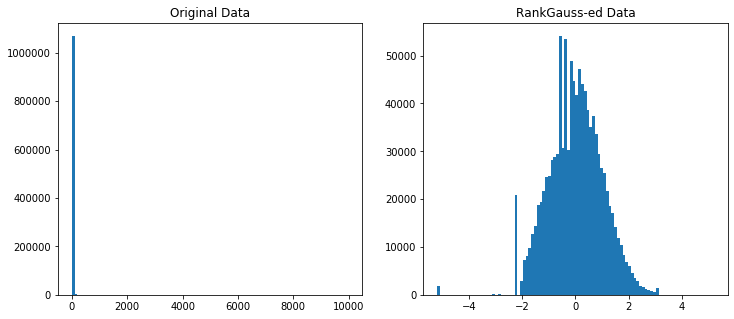

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(aux['trip_total'],bins=100)
ax1.title.set_text('Original Data')
ax2.hist(E,bins=100)
ax2.title.set_text('RankGauss-ed Data')
plt.show()